Inverse design classification based on R and T calculation from forward RCWA simulation for one layer system SiO2\TiO2 ( layer 80nm thickness).
For substrate I've added dielectric constant of quartz 3.76 into TRCWA TRCWA_BOTTOM_LAYER_EPS


**1.**

In [16]:
!git clone https://github.com/TijanaDj/NIDN.git

Cloning into 'NIDN'...
remote: Enumerating objects: 2786, done.
remote: Counting objects: 100% (1034/1034), done.
remote: Compressing objects: 100% (375/375), done.
remote: Total 2786 (delta 717), reused 899 (delta 657), pack-reused 1752
Receiving objects: 100% (2786/2786), 45.08 MiB | 22.82 MiB/s, done.
Resolving deltas: 100% (1823/1823), done.


In [17]:
%cd /content/NIDN

/content/NIDN


In [18]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
!python /content/NIDN/setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [20]:
### Imports
%load_ext autoreload
%autoreload 2

# Append main folder
import sys
sys.path.append("..")




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import torch

In [22]:
import nidn

In [8]:
from nidn import MaterialCollection

In [9]:
c = MaterialCollection((350,400))

In [ ]:
print(c.epsilon_matrix)

tensor([[ 0.7030+8.4840e-02j,  0.7030+8.4840e-02j],
        [ 2.0079+8.5020e-03j,  2.0079+8.5020e-03j],
        [ 6.0667+1.4778e-04j,  6.0667+1.4778e-04j],
        [-8.2060+9.1085e+00j, -8.2060+9.1085e+00j],
        [-0.8757+4.0293e+00j, -0.8757+4.0293e+00j],
        [ 0.7524+3.3186e-01j,  0.7524+3.3186e-01j],
        [ 3.3499-1.9042e-01j,  3.3499-1.9042e-01j],
        [ 2.6526+1.5116e+01j,  2.6526+1.5116e+01j],
        [ 4.1185+8.1177e-05j,  4.1185+8.1177e-05j],
        [ 2.0608+4.8904e+00j,  2.0608+4.8904e+00j],
        [-5.5660+5.5753e+00j, -5.5660+5.5753e+00j]])


In [ ]:
print(c.material_names)

['aluminium_nitride', 'gallium_arsenide', 'zinc_oxide', 'tantalum_pentoxide', 'titanium_oxide', 'silicon_nitride', 'titanium_nitride', 'indium_arsenide', 'aluminium_oxide', 'germanium', 'aluminium_arsenide']


In [ ]:
print(c.materials_folder)

/content/NIDN/nidn/materials/data/


In [23]:
# Start with the default config
cfg = nidn.load_default_cfg()

In [24]:
# Print run config
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 0              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : -100.0         |real_max_eps           : 100.0          |imag_min_eps           : 0.0            |
imag_max_eps           : 3.0            |solver                 : TRCWA          |Nx                     : 1              |
Ny      

In [25]:
# Titanium Oxide Uniform on glass
# Set grid specifics
cfg.Nx = 1
cfg.Ny = 1
cfg.N_layers = 1
cfg.N_freq = 128
cfg.TRCWA_BOTTOM_LAYER_EPS = 3.76
cfg.TRCWA_L_grid = [[0.1,0.0],[0.0,0.1]]
cfg.TRCWA_NG = 11
cfg.PER_LAYER_THICKNESS = [0.08]
cfg.freq_distribution = "linear"

# Specify your desired range of wavelengths
cfg.physical_wavelength_range[0] = 3e-7
cfg.physical_wavelength_range[1] = 1e-6

# Determine target frequencies (in TRCWA units)
cfg.target_frequencies = nidn.compute_target_frequencies(
    cfg.physical_wavelength_range[0],
    cfg.physical_wavelength_range[1],
    cfg.N_freq,
    cfg.freq_distribution
)

In [26]:
# Init eps_grid
eps_grid = torch.zeros(cfg.Nx,cfg.Ny,cfg.N_layers,cfg.N_freq,dtype=torch.cfloat)

layer_builder = nidn.LayerBuilder(cfg)

In [27]:
# Uniform Titanium nitride
eps_grid[:,:,0,:] = layer_builder.build_uniform_layer("titanium_oxide")


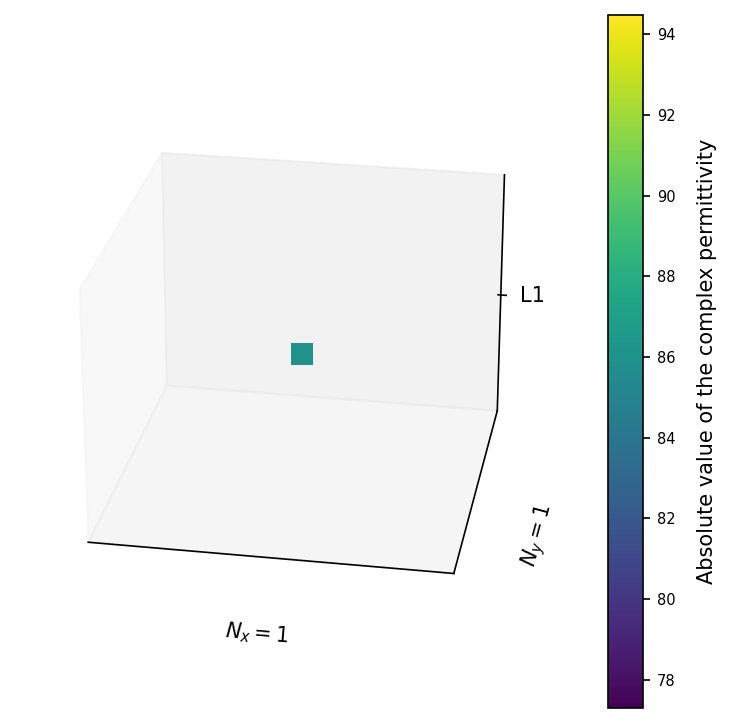

In [28]:
# Plot the abs values of the produced grid
nidn.plot_epsilon_grid(eps_grid,cfg)

In [29]:
# Print run config
nidn.print_cfg(cfg)

name                   : example_name   |use_gpu                : 0              |seed                   : 100            |
model_type             : siren          |iterations             : 3000           |learning_rate          : 8e-05          |
type                   : regression     |reg_loss_weight        : 0.05           |use_regularization_loss: 1              |
L                      : 1.0            |absorption_loss        : 0              |n_neurons              : 100            |
hidden_layers          : 9              |encoding_dim           : 4              |siren_omega            : 1.0            |
add_noise              : 0              |noise_scale            : 0.001          |eps_oversampling       : 1              |
real_min_eps           : -100.0         |real_max_eps           : 100.0          |imag_min_eps           : 0.0            |
imag_max_eps           : 3.0            |solver                 : TRCWA          |Nx                     : 1              |
Ny      

In [ ]:
R = [0.35, 0.35, 0.36, 0.36, 0.37, 0.37, 0.37, 0.38, 0.38, 0.38, 0.39, 0.39, 0.38, 0.38, 0.37, 0.37, 0.36, 0.36, 0.35, 0.34, 0.34, 0.33, 0.32, 0.32, 0.31, 0.3, 0.29, 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.21, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.14, 0.13, 0.12, 0.12, 0.11, 0.11, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.11, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.19, 0.2, 0.21, 0.23, 0.24, 0.26, 0.27, 0.29, 0.3, 0.32, 0.33, 0.35, 0.36, 0.38, 0.39, 0.4, 0.41, 0.43, 0.44, 0.44, 0.45, 0.46, 0.46, 0.47, 0.47, 0.47, 0.47, 0.46, 0.45, 0.44, 0.43, 0.41, 0.39, 0.37, 0.34, 0.32, 0.29, 0.27, 0.24, 0.23, 0.21, 0.21, 0.2, 0.21, 0.21, 0.22, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.31, 0.32, 0.32, 0.32, 0.32, 0.33, 0.33, 0.33, 0.33]
T = [0.65, 0.65, 0.65, 0.64, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.63, 0.64, 0.64, 0.64, 0.65, 0.65, 0.66, 0.66, 0.67, 0.67, 0.68, 0.69, 0.69, 0.7, 0.71, 0.71, 0.72, 0.73, 0.73, 0.74, 0.75, 0.76, 0.77, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.82, 0.83, 0.84, 0.85, 0.85, 0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.88, 0.88, 0.87, 0.87, 0.87, 0.86, 0.86, 0.85, 0.85, 0.84, 0.83, 0.82, 0.81, 0.79, 0.78, 0.77, 0.76, 0.74, 0.73, 0.72, 0.71, 0.69, 0.68, 0.67, 0.66, 0.64, 0.63, 0.62, 0.61, 0.6, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54, 0.54, 0.53, 0.52, 0.52, 0.52, 0.51, 0.51, 0.51, 0.5, 0.5, 0.5, 0.49, 0.48, 0.47, 0.45, 0.43, 0.4, 0.37, 0.33, 0.3, 0.25, 0.22, 0.18, 0.15, 0.12, 0.1, 0.08, 0.06, 0.04, 0.04, 0.03, 0.02, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [30]:
import numpy as np

def save_array_as_txt(array, filename):
   np.savetxt(filename, array)








In [31]:
my_array = 1000*nidn.freq_to_wl(cfg.target_frequencies)
save_array_as_txt(my_array, 'output.txt')#udji u NIDN

In [32]:
#ovde ubaci fajlove za R i T, tu gde je output. ovo dole poslozi dva csv fajla, 
#posle dole je dodat deo koji pročita listu

import csv

# read in experimental data from text file
data = np.loadtxt('/content/TiN_TiO2_50_50_T_RawData_calculated.txt', ndmin=2)
wavelength_exp = data[:, 0]  # in nm
transm_exp = data[:, 1]

# read in NIDN wavelengths from text file
nidn_data = np.loadtxt('/content/NIDN/output.txt', ndmin=2)
wavelengths_nidn = nidn_data[:, 0]  # in nm

# match NIDN wavelengths to closest experimental wavelength
indices = []
for wavelength in wavelengths_nidn:
    idx = np.argmin(np.abs(wavelength_exp - wavelength))
    indices.append(idx)

# save matched experimental wavelength and reflectivity values in CSV file
with open('matched_data_T.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['NIDN Wavelength (nm)', 'Matched Wavelength (nm)', 'T'])
    for i, idx in enumerate(indices):
        writer.writerow([wavelengths_nidn[i], wavelength_exp[idx], transm_exp[idx]/100])




In [33]:


# read in experimental data from text file
data = np.loadtxt('/content/TiO2_TiN_50_50_staklo_Rspec_RawData_calculated.txt', ndmin=2)
wavelength_exp = data[:, 0]  # in nm
reflectivity_exp = data[:, 1]

# read in NIDN wavelengths from text file
nidn_data = np.loadtxt('/content/NIDN/output.txt', ndmin=2)
wavelengths_nidn = nidn_data[:, 0]  # in nm

# match NIDN wavelengths to closest experimental wavelength
indices = []
for wavelength in wavelengths_nidn:
    idx = np.argmin(np.abs(wavelength_exp - wavelength))
    indices.append(idx)

# save matched experimental wavelength and reflectivity values in CSV file
with open('matched_data_R.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['NIDN Wavelength (nm)', 'Matched Wavelength (nm)', 'R'])
    for i, idx in enumerate(indices):
        writer.writerow([wavelengths_nidn[i], wavelength_exp[idx], reflectivity_exp[idx]/100])




In [36]:
import csv

# Define the CSV file path and the column index (starting from 0)
csv_file_path = "/content/NIDN/matched_data_R.csv"
column_index = 2

# Read the specified column from the CSV file as a list with two decimal places
R = []
with open(csv_file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for index, row in enumerate(reader):
        if index >= 128:
            break
        value = float(row[column_index])
        formatted_value = round(value, 2)  # Round to two decimal places
        R.append(formatted_value)

# Print the list of values
print(R)

# Save the values as a list in a text file



[0.37, 0.37, 0.37, 0.37, 0.37, 0.37, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.38, 0.37, 0.36, 0.36, 0.35, 0.34, 0.33, 0.33, 0.32, 0.31, 0.3, 0.29, 0.28, 0.27, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2, 0.19, 0.18, 0.17, 0.16, 0.15, 0.15, 0.14, 0.13, 0.12, 0.11, 0.1, 0.1, 0.09, 0.08, 0.08, 0.07, 0.07, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.07, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.1, 0.1, 0.1, 0.11, 0.11, 0.11, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.11, 0.11, 0.11, 0.1, 0.1, 0.1, 0.09, 0.09, 0.08, 0.08, 0.08, 0.08, 0.07, 0.07, 0.07, 0.08, 0.08, 0.08, 0.08, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.09, 0.08, 0.08, 0.08, 0.07, 0.07, 0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]


TypeError: ignored

In [35]:

# Define the CSV file path and the column index (starting from 0)
csv_file_path = "/content/NIDN/matched_data_T.csv"
column_index = 2

# Read the specified column from the CSV file as a list with two decimal places
T = []
with open(csv_file_path, 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for index, row in enumerate(reader):
        if index >= 128:
            break
        value = float(row[column_index])
        formatted_value = round(value, 2)  # Round to two decimal places
        T.append(formatted_value)

# Print the list of values
print(T)

# Save the values as a list in a text file
output_file_path = "output_T.txt"
with open(output_file_path, 'w') as file:
    file.write(str(data))


[0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.19, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18, 0.17, 0.17, 0.17, 0.17, 0.17, 0.16, 0.16, 0.16, 0.15, 0.15, 0.14, 0.13, 0.13, 0.12, 0.11, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.05, 0.04, 0.03, 0.03, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


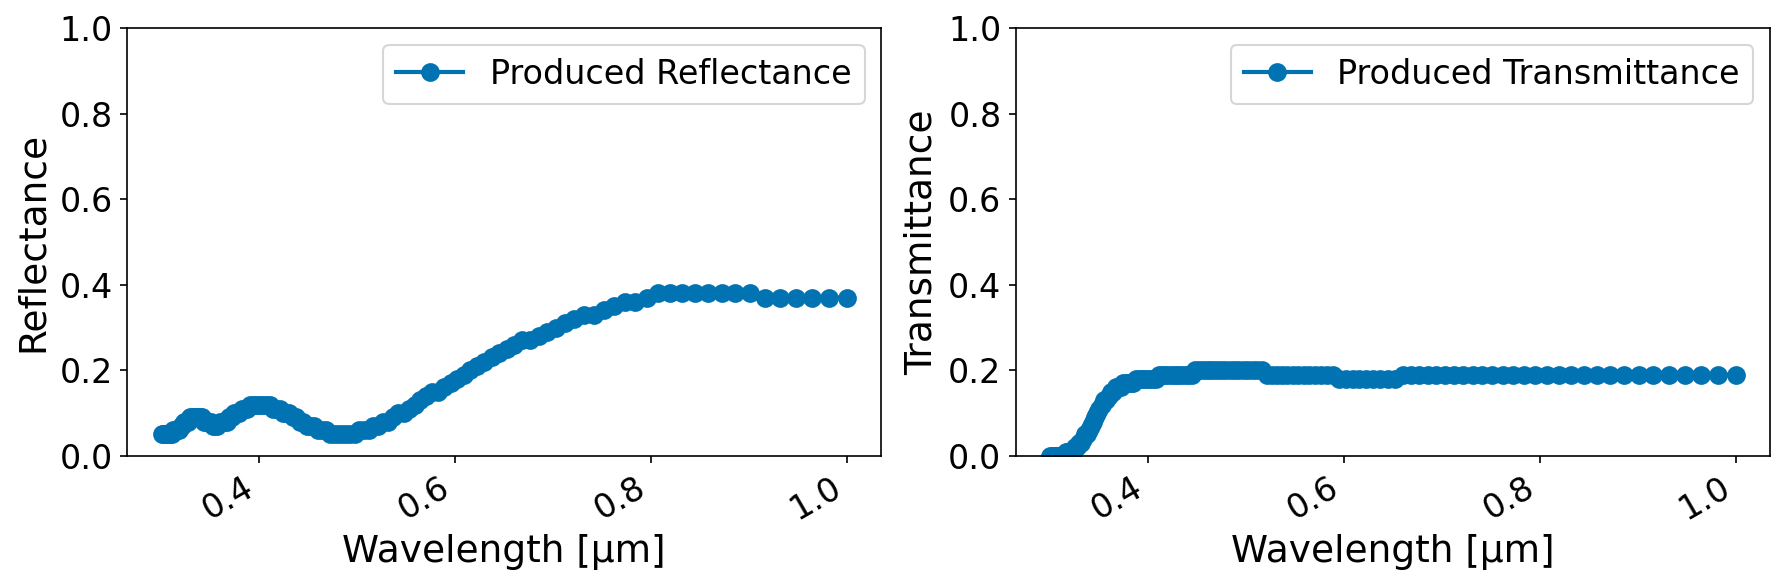

In [ ]:
nidn.plot_spectrum(cfg,R,T)

In [ ]:
print("R = [")
[print(f"{r.item():.8f}",end=",") for r in R]
print("]")
print("T = [")
[print(f"{t.item():.8f}",end=",") for t in T]
print("]")

R = [


AttributeError: ignored

**2.Classification problem based on previous calculation.**


In [ ]:
cfg.pop("model",None); # Forget the old model
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 1 # Choose number of layers

cfg.type = "classification" # Choose type as described above
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [ ]:
cfg.TRCWA_BOTTOM_LAYER_EPS = 3.76

cfg.PER_LAYER_THICKNESS = [0.08]

In [ ]:
cfg.target_reflectance_spectrum =   R
cfg.target_transmittance_spectrum = T

In [ ]:
nidn.run_training(cfg);

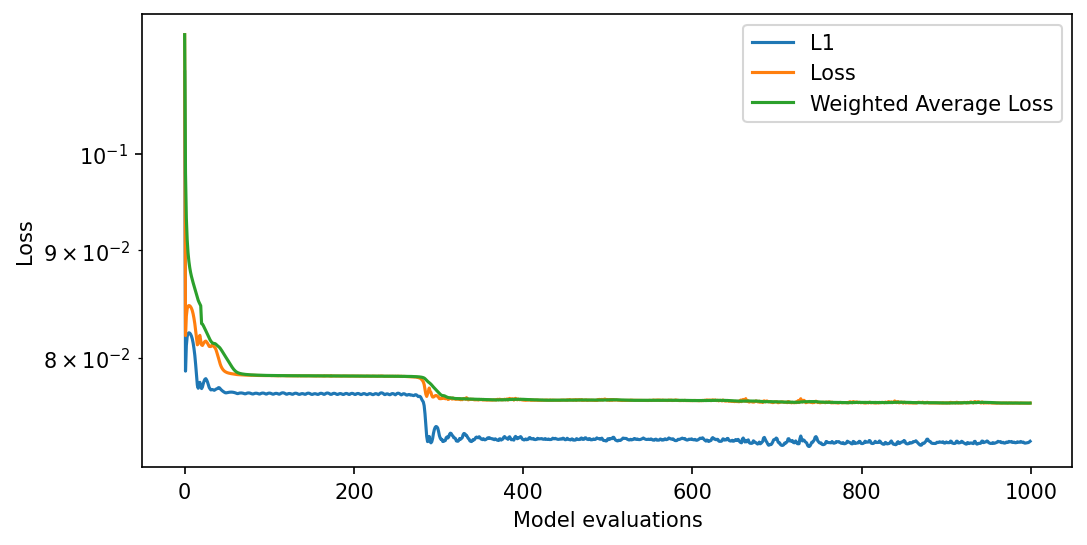

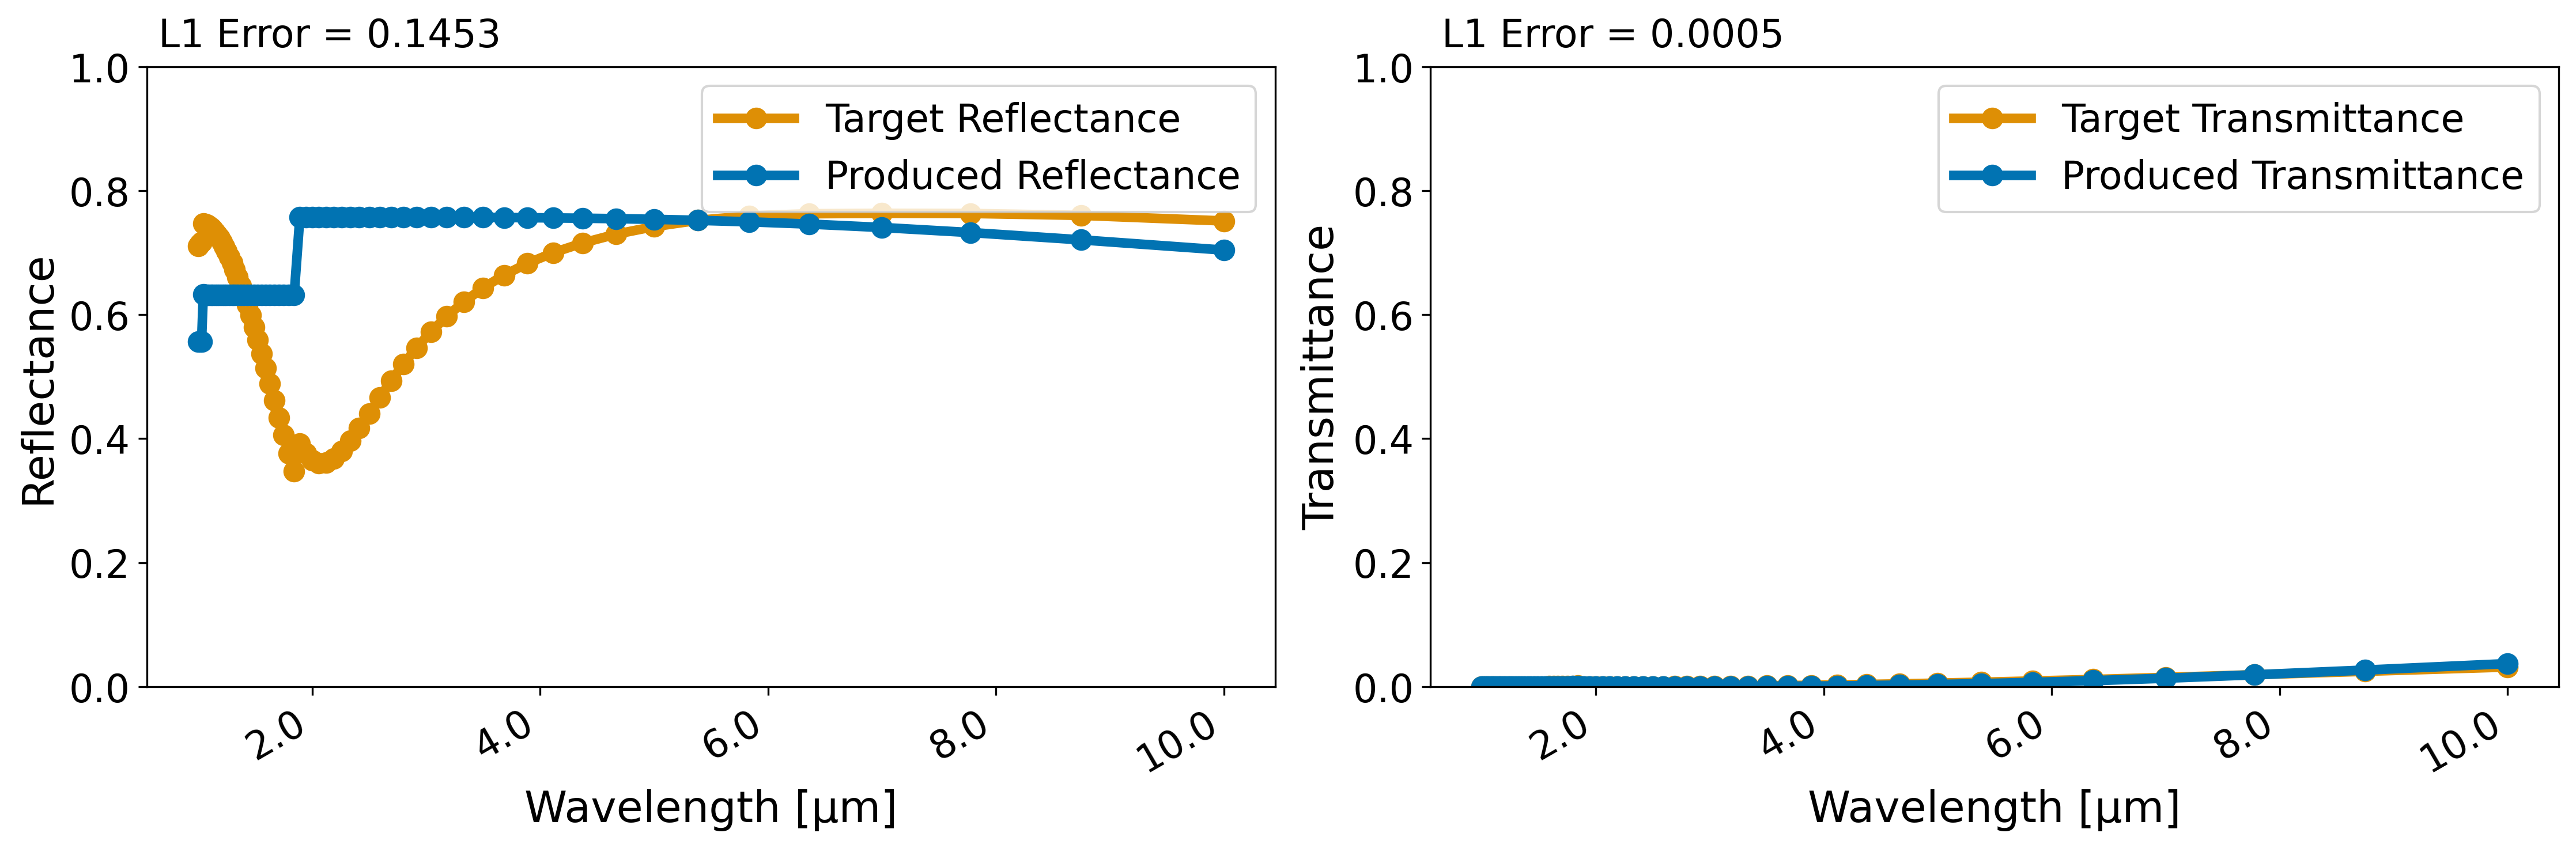

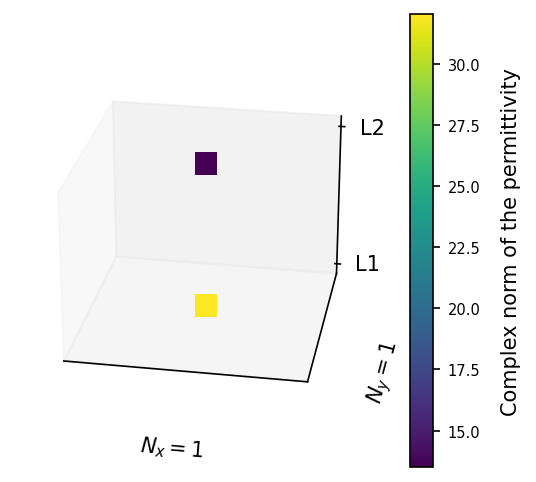

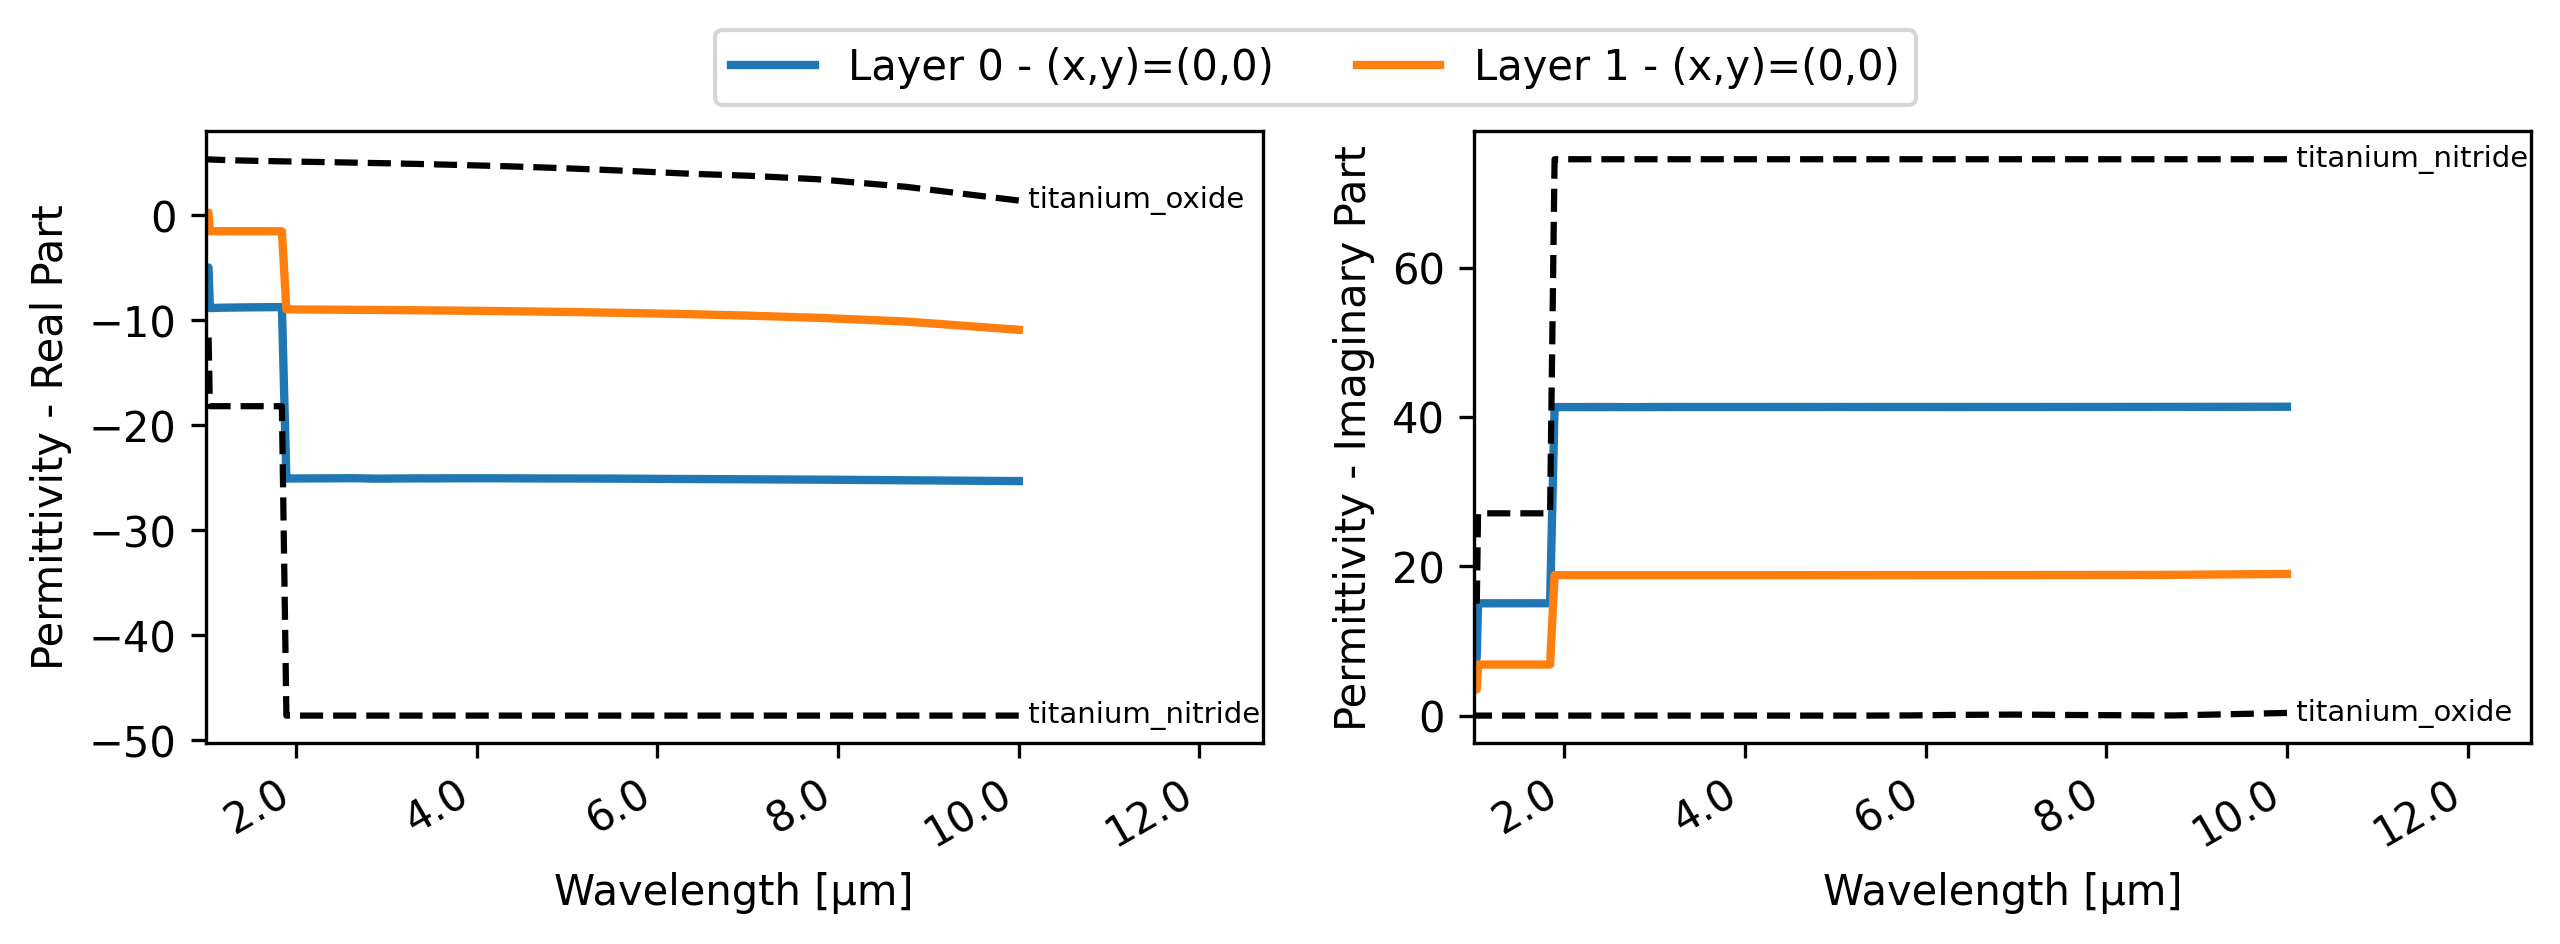

In [ ]:
nidn.plot_losses(cfg)
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide"])

**3. Regression problem**

In [ ]:
cfg.pop("model",None); # Forget the old model
cfg.Nx = 1 # Set layer size  to 1x1 (interpreted as uniform)
cfg.Ny = 1
cfg.N_layers = 2 # Choose number of layers
cfg.real_min_eps = 0.0
cfg.real_max_eps = 20.0
cfg.imag_min_eps = 0.0
cfg.imag_max_eps = 3.0


cfg.type = "regression" # Choose type as described above
cfg.iterations = 1000 # Set number of training iterations (that is forward model evaluations) to perform

In [ ]:
cfg.TRCWA_BOTTOM_LAYER_EPS = 3.9

cfg.PER_LAYER_THICKNESS = [0.2]

In [ ]:
cfg.target_reflectance_spectrum =   R
cfg.target_transmittance_spectrum = T

In [ ]:
nidn.run_training(cfg);

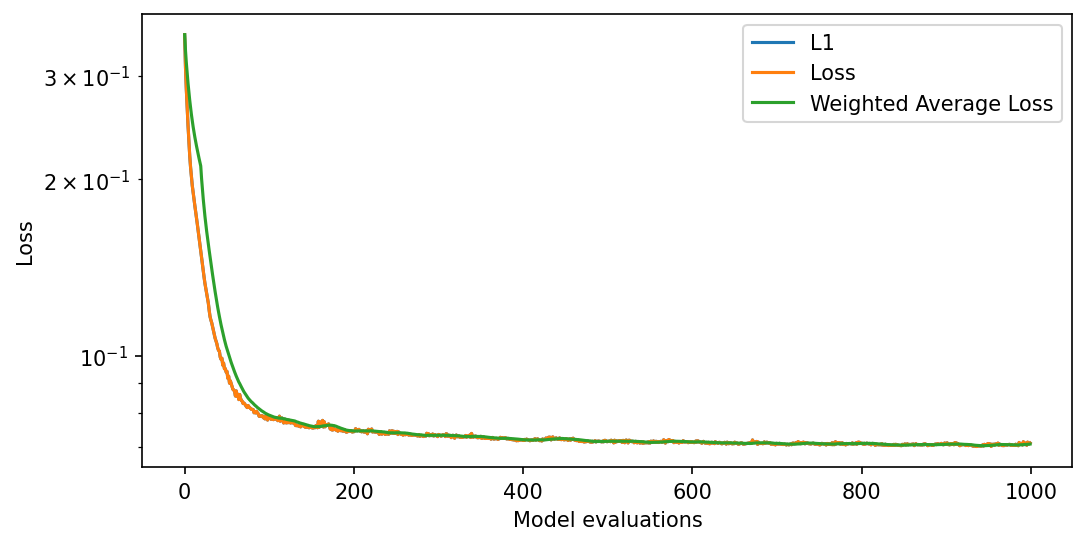

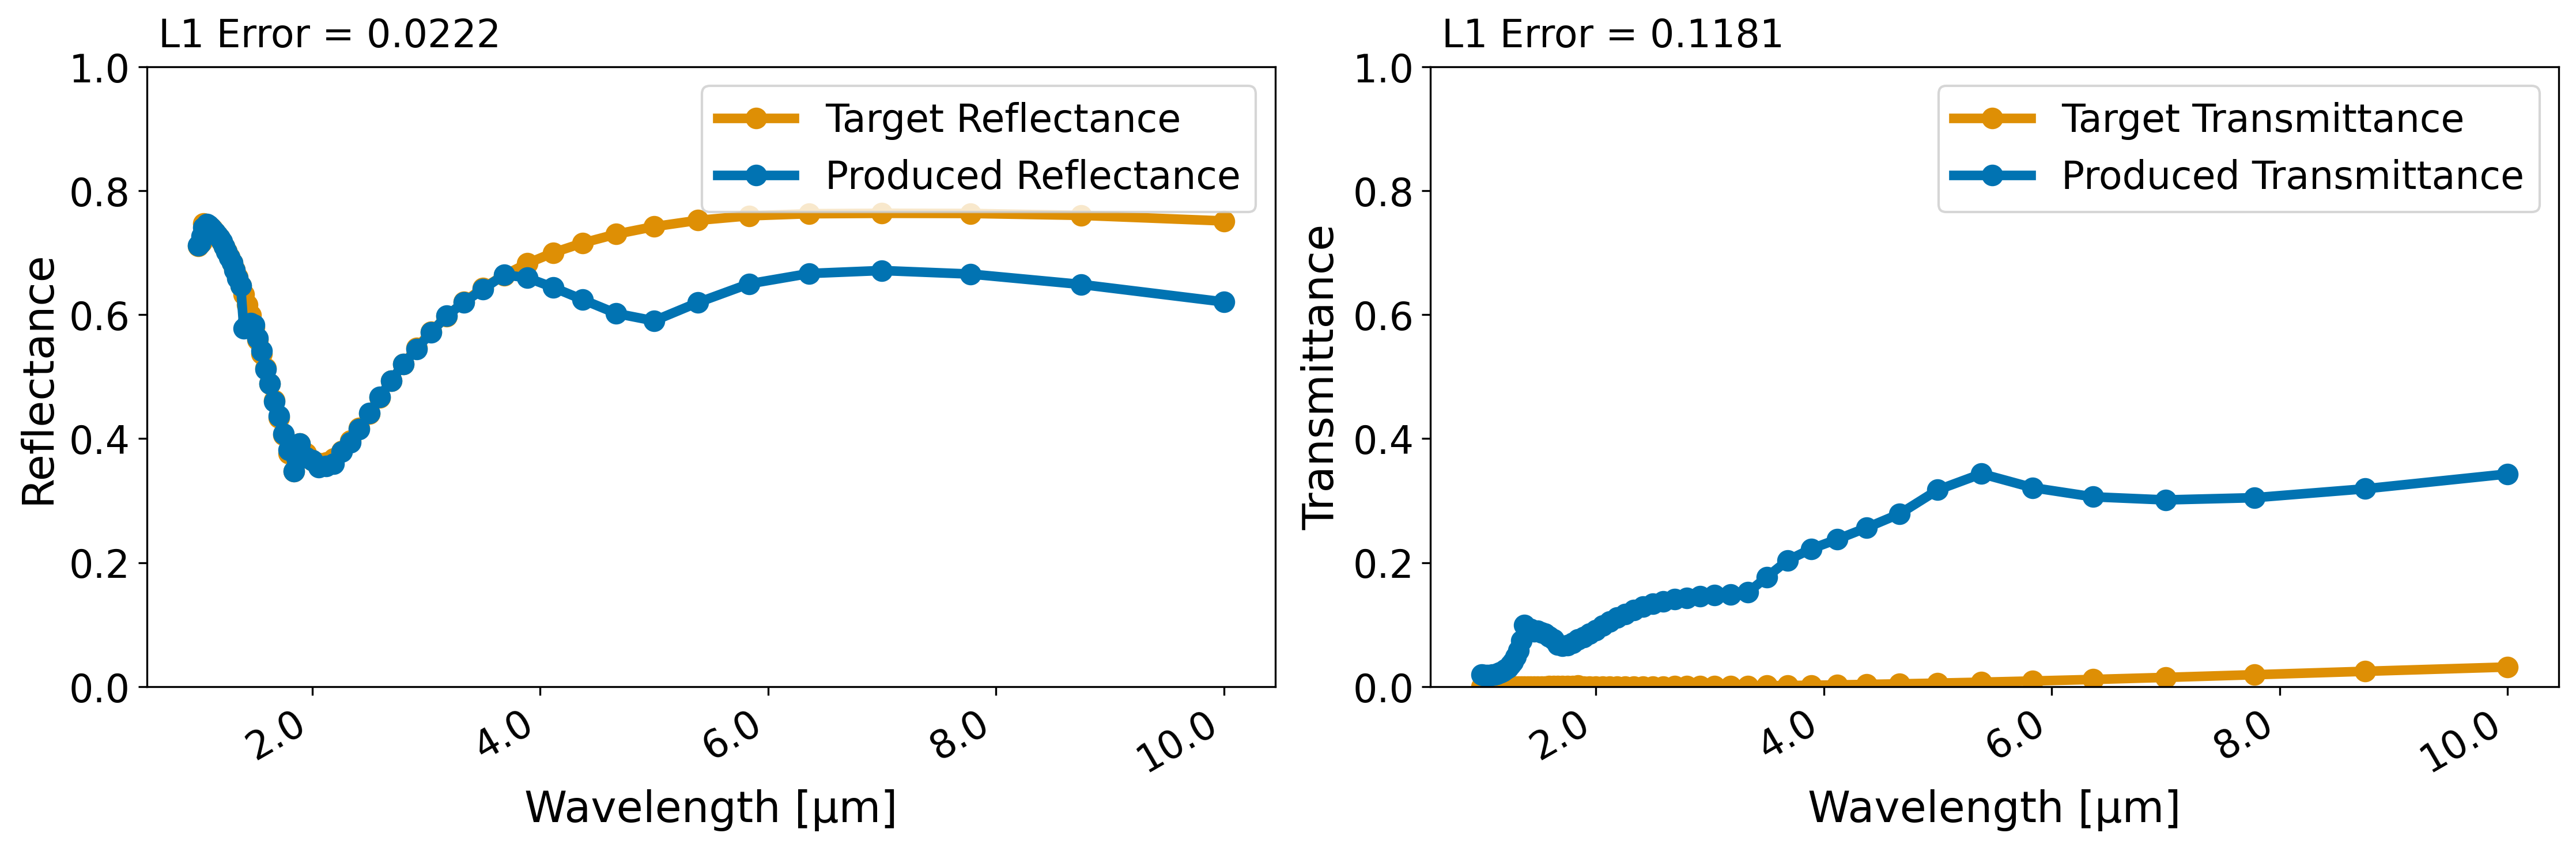

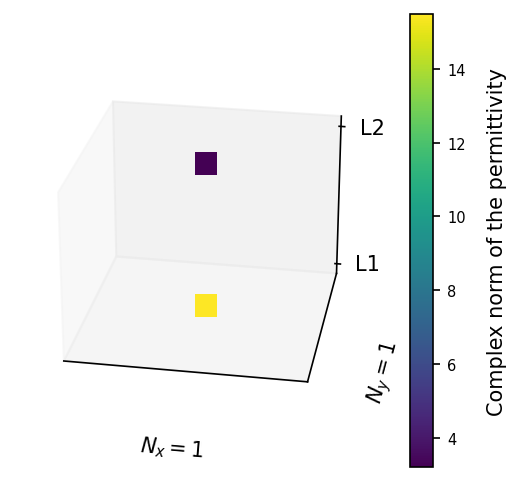

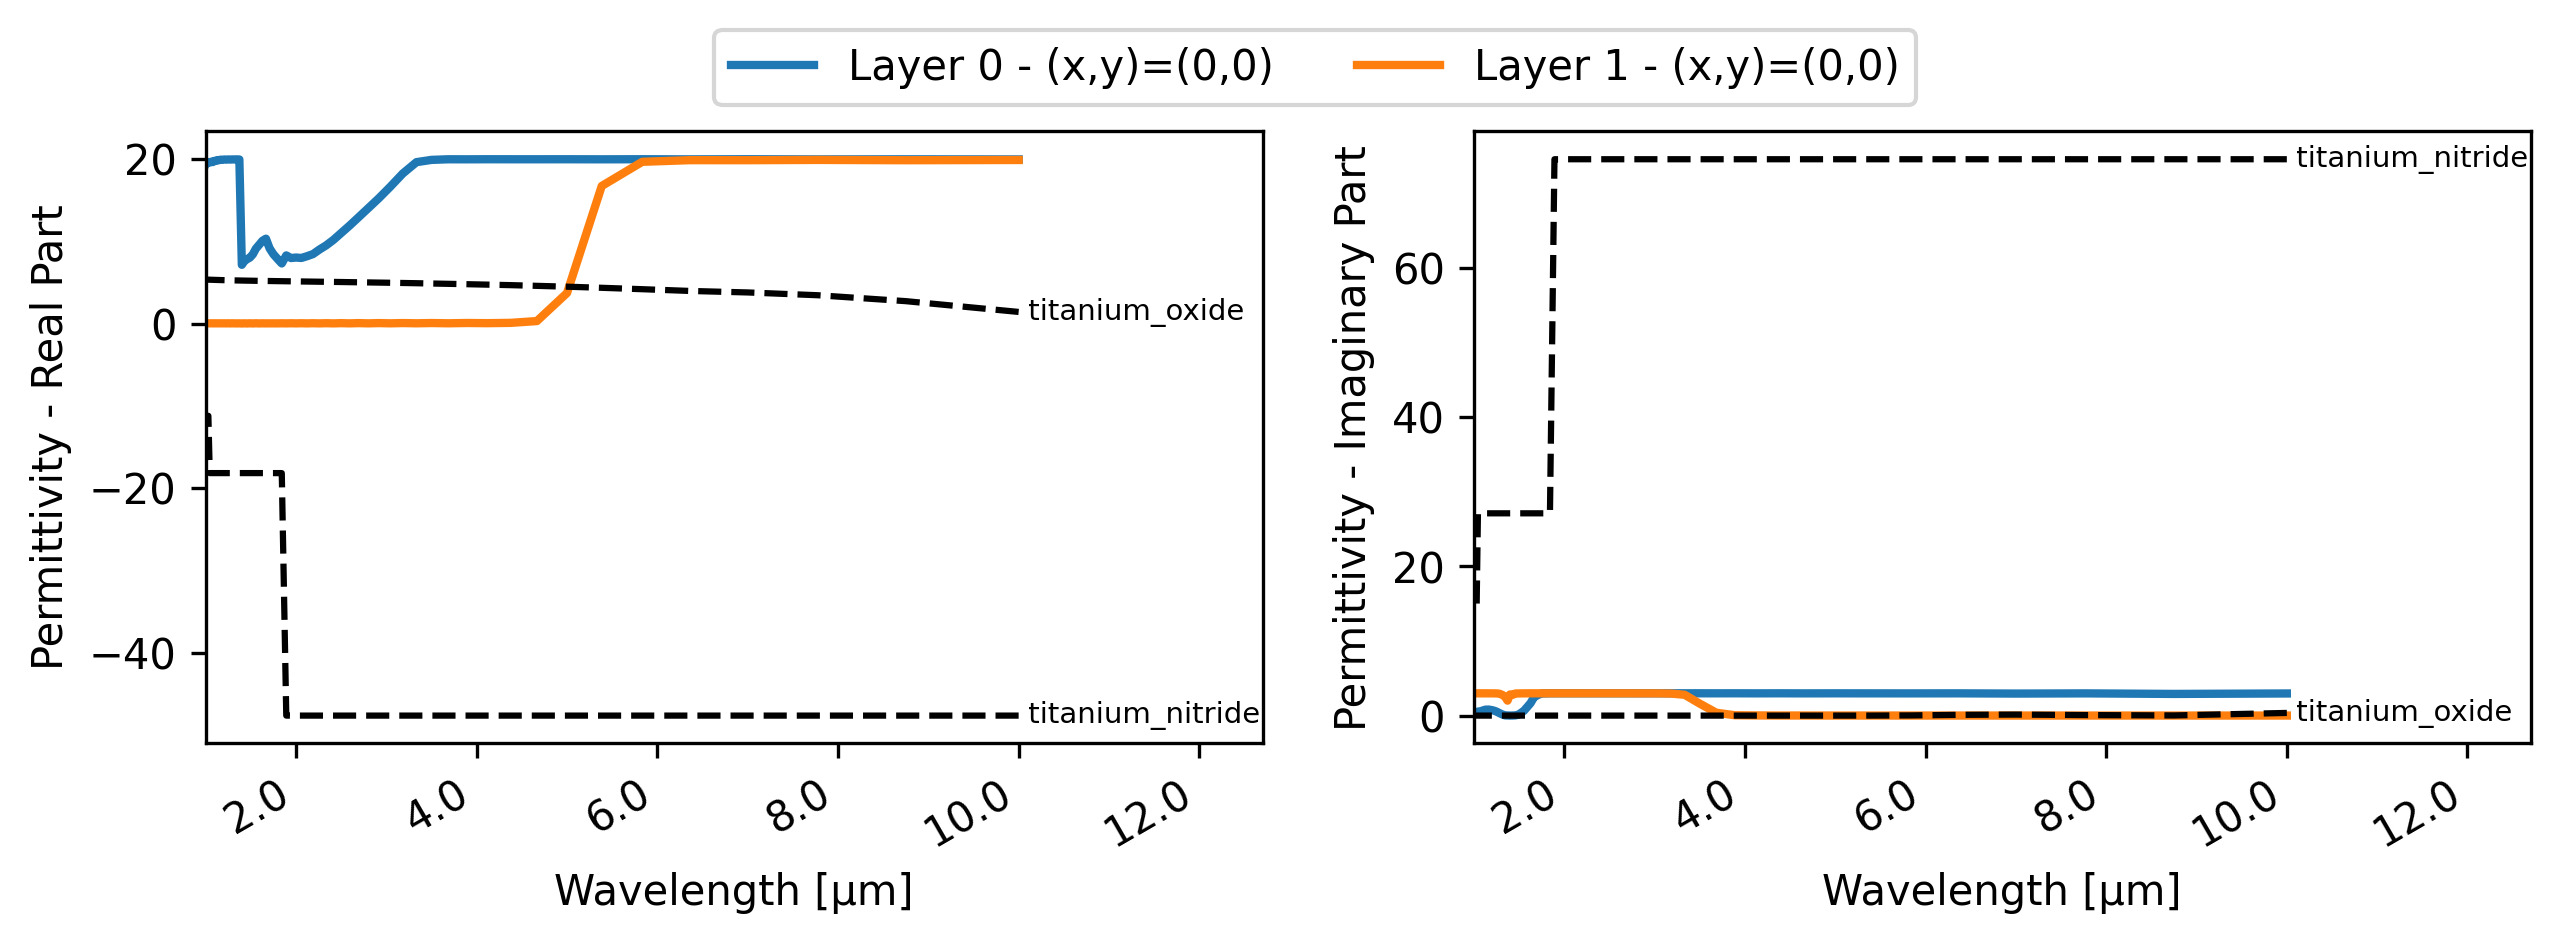

In [ ]:
nidn.plot_losses(cfg)
nidn.plot_spectra(cfg)
nidn.plot_model_grid(cfg)
nidn.plot_eps_per_point(cfg,compare_to_material=["titanium_oxide", "titanium_nitride"])

In [ ]:
import numpy as np

def calculate_refractive_index(wavelengths, real_part, imaginary_part):
    speed_of_light = 299792458  # m/s

    frequencies = speed_of_light / (wavelengths * 1e-9)  # Convert wavelength from nm to m

    delta_wavelength = np.diff(wavelengths)[0]  # Assume evenly spaced wavelength data
    delta_frequency = speed_of_light / (wavelengths[0] * 1e-9) * (1 - 1 / (len(wavelengths) + 1))

    integrals = np.cumsum(imaginary_part * delta_wavelength)
    integrals -= (0.5 * imaginary_part[0] * delta_wavelength)
    integrals *= (2 / np.pi)

    real_part_kk = real_part[0] + (2 / np.pi) * integrals

    refractive_index = np.sqrt(1 + (real_part_kk / (2 * np.pi * frequencies))**2)

    return refractive_index

# Example usage
wavelengths = np.array([400, 500, 600])  # Wavelengths in nm
real_part = np.array([2.5, 3.0, 2.8])
imaginary_part = np.array([0.1, 0.2, 0.05])

refractive_index = calculate_refractive_index(wavelengths, real_part, imaginary_part)
print(refractive_index)
